## Data Preprocessing

In [1]:
import pandas as pd 
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
# import data 
data = pd.read_csv('Eluvio_DS_Challenge.csv')

In [3]:
# check the size of data
data.shape

(509236, 8)

In [4]:
# check the first five rows of the data
data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,1/25/2008,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,1/25/2008,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,1/25/2008,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,1/25/2008,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,1/25/2008,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [5]:
# check missing values 
data.isnull().sum()
# fortunately, this dataset does not have missing values in any columns

time_created    0
date_created    0
up_votes        0
down_votes      0
title           0
over_18         0
author          0
category        0
dtype: int64

In [6]:
title = data['title']

In [7]:
# remove duplicates
title.drop_duplicates(keep='first',inplace=True)
title.shape

(500713,)

In [9]:
# convert to a list 
title = title.tolist()
new_title = [[i] for i in title]
new_title

[['Scores killed in Pakistan clashes'],
 ['Japan resumes refuelling mission'],
 ['US presses Egypt on Gaza border'],
 ['Jump-start economy: Give health care to all '],
 ['Council of Europe bashes EU&UN terror blacklist'],
 ['Hay presto! Farmer unveils the  illegal  mock-Tudor castle he tried to hide behind 40ft hay bales'],
 ['Strikes, Protests and Gridlock at the Poland-Ukraine Border'],
 ['The U.N. Mismanagement Program'],
 ['Nicolas Sarkozy threatens to sue Ryanair '],
 ['US plans for missile shields in Polish town met with resistance [video]'],
 ['Archbishop of Canterbury calls for new law to punish  thoughtless or cruel  words -Times Online'],
 ['Top US Envoy: Violence In Kenya Is  Ethnic Cleansing '],
 ['Team building float to commemorate the Holocaust in Rio De Jinero has one hell of an idea.'],
 ['Migrant workers told to abandon Lunar New Year holiday plans'],
 [' Sarkozy, Girlfriend Sue Ryanair Over Ad'],
 ['Nicolas Sarkozy, Angela Merkel confirm their opposition to Turkey bei

### Tokenize context

In [10]:
# tokenize words by using RegexpTokenizer#use RegexpTokenizer can remove all punctuations
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords #remove stop words
RegexpToken = RegexpTokenizer(r"\w+")
stop_words = set(stopwords.words('english'))

new_content = []
#tokenize
for m in range(len(new_title)): 
    tokenized = RegexpToken.tokenize(str(new_title[m]))
    new_content.append(tokenized)

### Remove stop words

In [11]:
#remove stop words and convert words to lower case
reg_text_corpus_without_stopwords = []
for m in range(len(new_content)):
    words = []
    for n in range(len(new_content[m])):
        if new_content[m][n] not in stop_words:
            new_content[m][n] = new_content[m][n].lower()
            words.append(new_content[m][n]) 
    reg_text_corpus_without_stopwords.append(words)           

In [12]:
#check data
reg_text_corpus_without_stopwords[0:5]

[['scores', 'killed', 'pakistan', 'clashes'],
 ['japan', 'resumes', 'refuelling', 'mission'],
 ['us', 'presses', 'egypt', 'gaza', 'border'],
 ['jump', 'start', 'economy', 'give', 'health', 'care'],
 ['council', 'europe', 'bashes', 'eu', 'un', 'terror', 'blacklist']]

### Lemmatization

In [13]:
# lemma 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_words = []
for m in range(len(reg_text_corpus_without_stopwords)):
    lemmatized = []
    for n in range(len(reg_text_corpus_without_stopwords[m])):
        lemmatized.append(wordnet_lemmatizer.lemmatize(reg_text_corpus_without_stopwords[m][n]))
    lemmatized_words.append(lemmatized)    
        

In [14]:
# check data after using WordnetLemmatizer
lemmatized_words[0:5]

[['score', 'killed', 'pakistan', 'clash'],
 ['japan', 'resume', 'refuelling', 'mission'],
 ['u', 'press', 'egypt', 'gaza', 'border'],
 ['jump', 'start', 'economy', 'give', 'health', 'care'],
 ['council', 'europe', 'bash', 'eu', 'un', 'terror', 'blacklist']]

## Topic Modeling

In [15]:
# run the code below to install gensim as needed 
#pip install gensim

In [16]:
# make a dictionary for topic modeling 
from gensim import corpora
dictionary = corpora.Dictionary(lemmatized_words)

In [17]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [18]:
# Converting orpus into Document Term Matrix using dictionary prepared above.
term_matrix = [dictionary.doc2bow(content) for content in lemmatized_words]

In [19]:
# check the first 10 matrix
for i in term_matrix[:10]:
    print(i)

[(0, 1), (1, 1), (2, 1), (3, 1)]
[(4, 1), (5, 1), (6, 1), (7, 1)]
[(8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]
[(13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]
[(19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)]
[(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1)]
[(8, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)]
[(12, 1), (44, 1), (45, 1), (46, 1), (47, 1)]
[(48, 1), (49, 1), (50, 1), (51, 1), (52, 1)]
[(12, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)]


In [34]:
from gensim.models.ldamodel import LdaModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

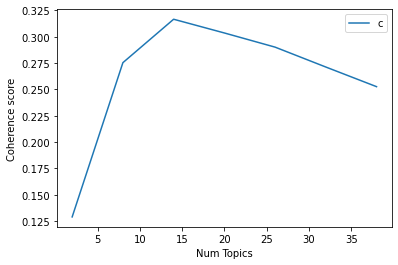

In [35]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=term_matrix, 
                                                        texts = lemmatized_words, start=2, limit=40, step=6)

import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### When the number of topics is 15, there are too many overlaps in the following graph. So I chose 10 here as the number of topics. 

In [41]:
# this part of code takes some time to run
# Creating the object for LDA model using gensim library
import gensim
Lda = gensim.models.ldamodel.LdaModel
# Running and Trainign LDA model on the term matrix.
ldamodel = Lda(term_matrix, num_topics=10, id2word = dictionary, passes=1,per_word_topics=True,
                                           update_every=5,
                                           chunksize=10000)
for topic in ldamodel.print_topics(num_topics=10, num_words=10):
    print(topic)

(0, '0.017*"isi" + 0.010*"syria" + 0.010*"u" + 0.008*"state" + 0.007*"the" + 0.007*"islamic" + 0.006*"say" + 0.006*"al" + 0.005*"military" + 0.005*"report"')
(1, '0.012*"turkey" + 0.009*"attack" + 0.009*"000" + 0.007*"french" + 0.007*"say" + 0.006*"1" + 0.006*"police" + 0.006*"the" + 0.005*"election" + 0.005*"million"')
(2, '0.015*"killed" + 0.011*"attack" + 0.009*"year" + 0.009*"kill" + 0.008*"dead" + 0.008*"death" + 0.007*"people" + 0.007*"police" + 0.007*"least" + 0.006*"two"')
(3, '0.022*"korea" + 0.021*"north" + 0.017*"south" + 0.016*"china" + 0.009*"sea" + 0.007*"korean" + 0.006*"new" + 0.005*"child" + 0.004*"u" + 0.004*"ship"')
(4, '0.016*"u" + 0.011*"russia" + 0.009*"iran" + 0.009*"say" + 0.009*"eu" + 0.008*"ukraine" + 0.008*"china" + 0.007*"new" + 0.007*"nuclear" + 0.006*"s"')
(5, '0.012*"u" + 0.010*"china" + 0.007*"missile" + 0.006*"say" + 0.006*"world" + 0.006*"protester" + 0.006*"israeli" + 0.005*"s" + 0.005*"chinese" + 0.005*"russian"')
(6, '0.013*"u" + 0.011*"minister" + 

## Visualization of topics

In [42]:
# visualize the topics 
import pyLDAvis

In [43]:
import pyLDAvis.gensim_models

In [44]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [45]:
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, term_matrix, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

## Sentiment Analysis 

In [59]:
new_title_pd = pd.DataFrame(new_title)
new_title_pd.columns = ['sentence']

In [60]:
new_title_pd.head()

,sentence
0,Scores killed in Pakistan clashes
1,Japan resumes refuelling mission
2,US presses Egypt on Gaza border
3,Jump-start economy: Give health care to all
4,Council of Europe bashes EU&UN terror blacklist


In [62]:
# sentiment analysis
from textblob import TextBlob
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

new_title_pd['polarity'] = new_title_pd['sentence'].apply(pol)
new_title_pd['subjectivity'] = new_title_pd['sentence'].apply(sub)
new_title_pd


,sentence,polarity,subjectivity
0,Scores killed in Pakistan clashes,-0.2,0.0
1,Japan resumes refuelling mission,0.0,0.0
2,US presses Egypt on Gaza border,0.0,0.0
3,Jump-start economy: Give health care to all,0.0,0.0
4,Council of Europe bashes EU&UN terror blacklist,0.0,0.0
...,...,...,...
500708,Heil Trump : Donald Trump s alt-right white...,0.0,0.0
500709,There are people speculating that this could b...,0.0,0.0
500710,Professor receives Arab Researchers Award,0.0,0.0
500711,Nigel Farage attacks response to Trump ambassa...,0.0,0.0


In [71]:
score = []
for i in range(len(new_title_pd['polarity'])):
    if new_title_pd['polarity'][i] < 0:
        score.append('Negative')
    elif new_title_pd['polarity'][i] == 0:
        score.append('Neutral')
    else:
        score.append('Positive')

In [89]:
from collections import Counter
count= Counter(score)

Counter({'Negative': 108971, 'Neutral': 266995, 'Positive': 124747})

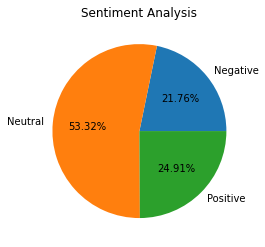

In [98]:
opinions = ['Negative','Neutral','Positive']
values = [108971,266995,124747]
import matplotlib.pyplot as plt
plt.figure()
plt.pie(values,labels=opinions,autopct='%0.2f%%')
plt.title('Sentiment Analysis')
plt.show()